# implement linear regression from scratch for Higher dimentional Datasets

In [1]:
# Loading necessary library

import numpy as np
import sklearn
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

# Loading Dataset

In [10]:

from sklearn.datasets import load_boston
boston_dataset = load_boston()
data = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
data = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
data['MEDV'] = boston_dataset.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
print(boston_dataset.keys())


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [12]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

# EDA(Exploratory Data Analysis)

In [13]:
# First, let us make sure there are no missing values or NANs in the dataset
print(data.isnull().sum())


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


# Plot the target variable

c:\python\python391\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


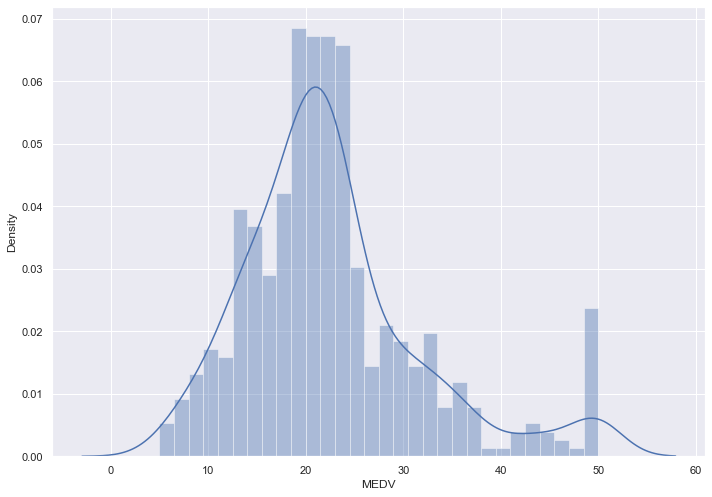

In [15]:
# Next, let us plot the target vaqriable MEDV

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['MEDV'], bins=30)
plt.show()


# Let us get the correlation matrix

<AxesSubplot:>

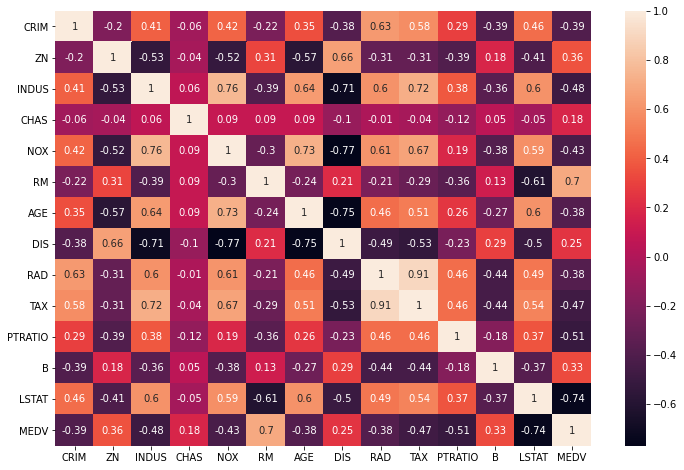

In [14]:
plt.figure(figsize=(12,8))
# Let us get the correlation matrix
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

# Let us take few of the features and see how they relate to the target in a 1D plot

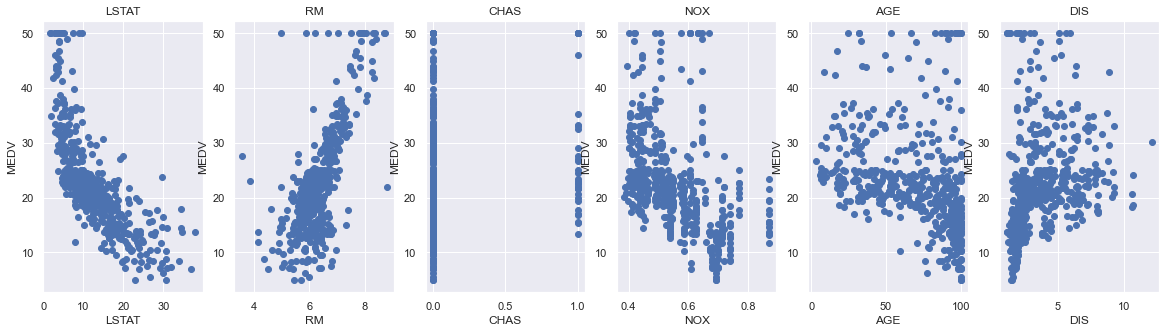

In [16]:

plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM','CHAS','NOX','AGE','DIS']
target = data['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

# Scaling the Datasets


In [25]:

from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
sc = preprocessing.StandardScaler()

data = pd.DataFrame(sc.fit_transform(data))
data.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.159686
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,-0.101524
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,1.324247
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,1.182758
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,1.487503


In [26]:
# Forming Matrices

data = data.iloc[:,0:14]

#setting the matrices
X = data.iloc[:,0:13] #Feature Set
y = data.iloc[:,13].values # Target Values
y = y.reshape(data.shape[0],1)

In [27]:
# Train test Spliting

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [28]:
#Initialize weight vector
weight = np.zeros([1,13])

#set hyper parameters
lr = 0.001
ite = 10000

In [29]:
# Suare Loss Function

def SquaredLoss(X_train,y_train,weight):
    Loss = np.power(((np.dot(X_train,weight.T))-y_train),2)
    return np.sum(Loss)/(2 * len(X_train))

In [30]:
# Gradient Descent Method

def GradientDescent(X_train,y_train,weight,ite,lr):
    cost = np.zeros(ite)
    for i in range(ite):
        weight = weight - (lr/len(X_train)) * np.sum(X_train * (np.dot(X_train,weight.T) - y_train), axis=0).to_numpy()
        cost[i] = SquaredLoss(X_train, y_train, weight)
    
    return weight,cost


# Working on Training Data

In [44]:
#running the gd and cost function
coeff,cost = GradientDescent(X_train,y_train,weight,ite,lr)

In [45]:
print(coeff)

[[-0.10823098  0.09387089 -0.04608523  0.08206429 -0.15042268  0.28479391
  -0.00878396 -0.30059814  0.18850003 -0.08396162 -0.2128864   0.11783418
  -0.45010454]]


In [46]:
print(cost)

[0.50621369 0.50360007 0.50101418 ... 0.1351532  0.13515288 0.13515256]


# Plotting of Training  cost function

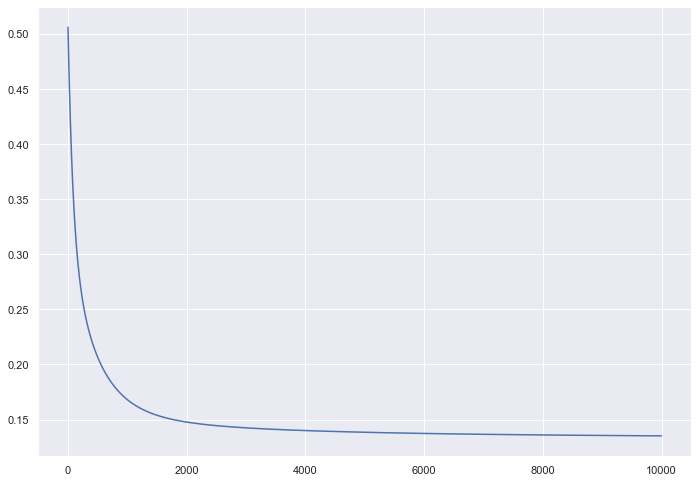

In [47]:
plt.plot(cost)

Comment: We see cost is decreasing

In [48]:
Final_Loss = SquaredLoss(X_train,y_train,weight)
print("Final Loss for training Data: ", Final_Loss)

Final Loss for training Data:  0.5088553646432538


# Working on Test Data

In [49]:
coeff1,cost1 = GradientDescent(X_test,y_test,weight,ite,lr)

In [50]:
print(coeff1)

[[ 0.07173126  0.03622089  0.01195831  0.05242905 -0.18254342  0.53293053
  -0.04210683 -0.21591005  0.04296817 -0.1477724  -0.22005937  0.06295663
  -0.11766123]]


In [51]:
print(cost1)

[0.46198379 0.45907516 0.45619949 ... 0.08502406 0.08502393 0.0850238 ]


# Plotting of Test cost

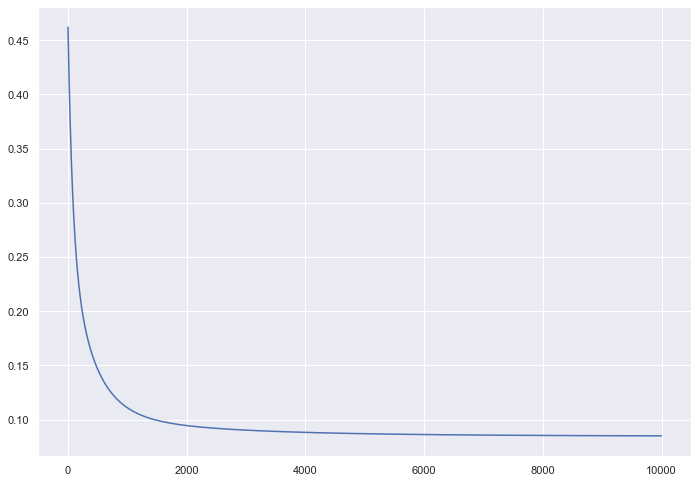

In [52]:
plt.plot(cost1)

In [53]:
Final_Loss = SquaredLoss(X_test,y_test,weight)
print("Final Loss for Test data: ", Final_Loss)

Final Loss for Test data:  0.4649258106286811


# Comment: it seems Model not very bad

# Using Sklearn Method on Training Data :

In [54]:
# Lets now train the model
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [76]:
# Model Evaluation
# Lets first evaluate on training set
from sklearn.metrics import r2_score

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

y_pred_train = lin_model.predict(X_train)
rmse_train = rmse(y_pred_train, y_train)
r2_train = r2_score(y_train, y_pred_train)
print("Training RMSE = " + str(rmse_train))
print("Training R2 = " + str(r2_train))
print(lin_model.coef_)


Training RMSE = 0.5159985889082777
Training R2 = 0.7383393920590519
[[-0.122  0.125  0.001  0.075 -0.201  0.261  0.003 -0.342  0.345 -0.241
  -0.224  0.117 -0.461]]


In [77]:
# Let us now evaluate on the test set
y_pred_test = lin_model.predict(X_test)
rmse_test = rmse(y_pred_test, y_test)
r2_test = r2_score(y_test, y_pred_test)
print("Test RMSE = " + str(rmse_test))
#print("Test R2 = " + str(r2_test))

# Finally, let us see the learnt weights!
np.set_printoptions(precision=3)


Test RMSE = 0.4972013824526477


In [87]:
preds_df_test = pd.DataFrame(zip(y_test, y_pred_test), columns = ["Actual", "Predicted"]).astype(float)
preds_df_test.head(10)

,Actual,Predicted
0,1.639875,1.635861
1,0.584152,1.046107
2,0.007313,0.493353
3,-0.950457,-1.835218
4,1.378665,1.367763
5,-1.320504,-1.814840
6,0.148802,0.544653
7,0.703873,1.009727
8,0.029081,0.416145
9,0.072616,0.026043


<AxesSubplot:>

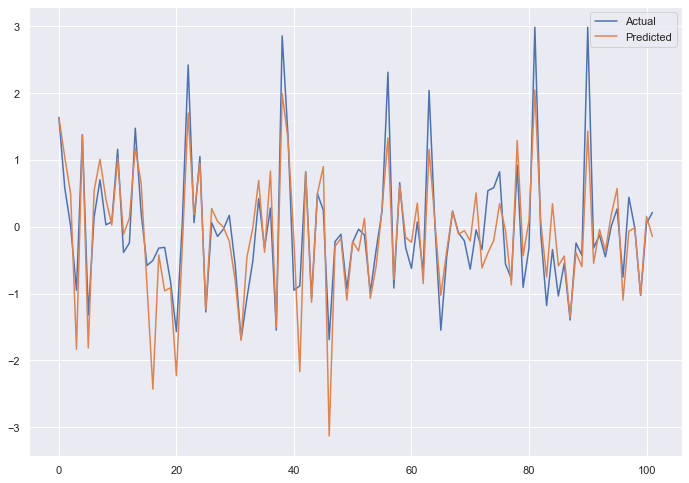

In [88]:
preds_df_test.plot()

# Important Features Selection

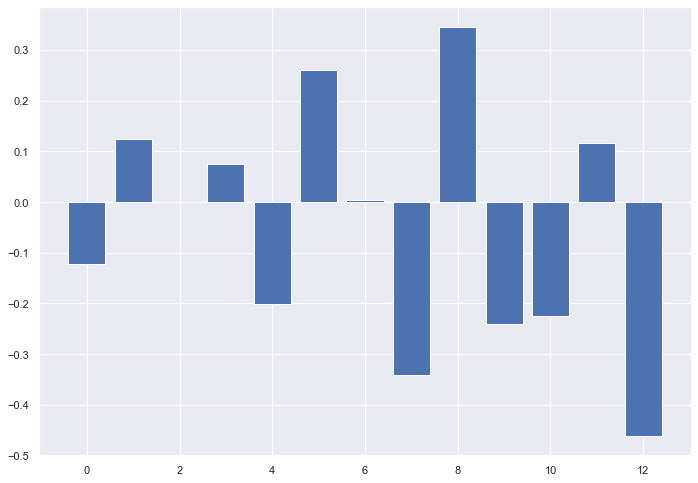

In [58]:
from matplotlib import pyplot
importance = lin_model.coef_[0]
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Using Random Forest

C:\Users\16823\AppData\Local\Temp/ipykernel_13564/3768002441.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


[0.055 0.001 0.007 0.001 0.015 0.369 0.013 0.068 0.003 0.015 0.014 0.01
 0.428]


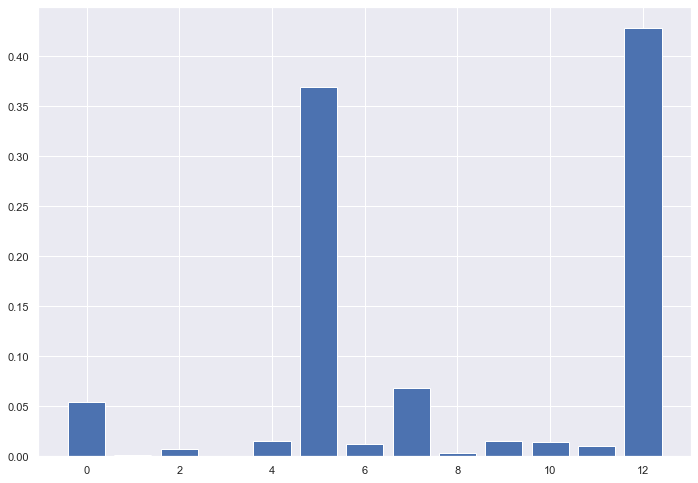

In [59]:
from sklearn.ensemble import RandomForestRegressor

# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
print(importance)
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# XGBoost Feature Importance

[0.055 0.001 0.007 0.001 0.015 0.369 0.013 0.068 0.003 0.015 0.014 0.01
 0.428]


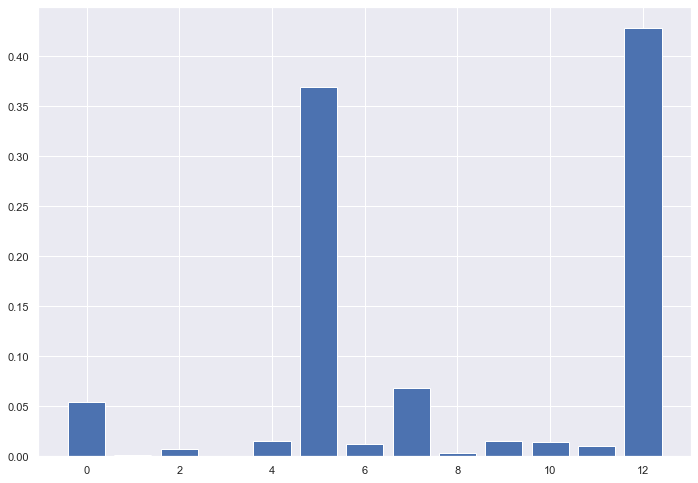

In [60]:
from xgboost import XGBRegressor
# define the model
modelX = XGBRegressor()
# fit the model
modelX.fit(X_train, y_train)
# get importance
importanceX = model.feature_importances_
print(importanceX)
pyplot.bar([x for x in range(len(importanceX))], importanceX)
pyplot.show()